# NAMA    : AGUNG REYNALDI AVIZENA <BR>NIM     : 1103204044 <BR><BR>UTS DATA SAINS DAN ANALISIS

# <strong> 1. Mengambil Data </strong>
----

In [1]:
!kaggle datasets list

ref                                                         title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                   146KB  2023-10-05 06:45:37          18454        398  1.0              
redpen12/employees-satisfaction-analysis                    Employee Satisfaction Survey Data                  140KB  2023-11-03 08:56:49            938         27  1.0              
nelgiriyewithana/billionaires-statistics-dataset            Billionaires Statistics Dataset (2023)             139KB  2023-09-29 13:39:28          10018        247  1.0              
joebeachcapital/30000-spotify-songs                         30000 Spotify Songs      

In [2]:
# Download dan ekstrak dataset, secara default akan berada dalam satu direktori dengan notebook ini
!kaggle datasets download nelgiriyewithana/billionaires-statistics-dataset   --unzip 

billionaires-statistics-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


## - Import Library
---

In [3]:
# import library
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor

## - Memuat Data
---

In [4]:
# load dataset
dataset = "Billionaires Statistics Dataset.csv"
df = pd.read_csv(dataset)

df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


# <strong> 2. Analisa Data (Materi 5) </strong>
----

## - Menelaah Data

In [5]:
df.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


In [6]:
# mengungkap tipe-tipe data dari setiap kolom
print(df.dtypes)

rank                                            int64
finalWorth                                      int64
category                                       object
personName                                     object
age                                           float64
country                                        object
city                                           object
source                                         object
industries                                     object
countryOfCitizenship                           object
organization                                   object
selfMade                                         bool
status                                         object
gender                                         object
birthDate                                      object
lastName                                       object
firstName                                      object
title                                          object
date                        

In [7]:
# Karena pada data terdapat kolom yang memiliki kategori boolean maka harus diganti ke numerical. Karena, hal ini berpengaruh terhadap perhitungan nantinya
df['selfMade'] = df['selfMade'].astype(int)

In [8]:
# mengungkap tipe-tipe data dari setiap kolom
print(df.dtypes)

rank                                            int64
finalWorth                                      int64
category                                       object
personName                                     object
age                                           float64
country                                        object
city                                           object
source                                         object
industries                                     object
countryOfCitizenship                           object
organization                                   object
selfMade                                        int32
status                                         object
gender                                         object
birthDate                                      object
lastName                                       object
firstName                                      object
title                                          object
date                        

In [9]:
# jika ingin menampilkan juga statistik kolom- 
# yang bertipe non-numerik, mencakup beberapa banyak nilai unik- 
# dalam kolom (unique), nilai modus(top), serta frekuensi modus(freq)
df.describe(exclude="object")

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2640.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,0.686364,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,0.464058,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,0.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,0.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,1.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


In [10]:
df.shape[0]

2640

In [11]:
df.mean()

C:\Users\agung\AppData\Local\Temp\ipykernel_2672\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


rank                                          1.289159e+03
finalWorth                                    4.623788e+03
age                                           6.514019e+01
selfMade                                      6.863636e-01
birthYear                                     1.957183e+03
birthMonth                                    5.740250e+00
birthDay                                      1.209984e+01
cpi_country                                   1.277552e+02
cpi_change_country                            4.364169e+00
gross_tertiary_education_enrollment           6.722567e+01
gross_primary_education_enrollment_country    1.028585e+02
life_expectancy_country                       7.812282e+01
tax_revenue_country_country                   1.254624e+01
total_tax_rate_country                        4.396334e+01
population_country                            5.102053e+08
latitude_country                              3.490359e+01
longitude_country                             1.258316e+

In [12]:
df.median()

C:\Users\agung\AppData\Local\Temp\ipykernel_2672\530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


rank                                          1.312000e+03
finalWorth                                    2.300000e+03
age                                           6.500000e+01
selfMade                                      1.000000e+00
birthYear                                     1.957000e+03
birthMonth                                    6.000000e+00
birthDay                                      1.100000e+01
cpi_country                                   1.172400e+02
cpi_change_country                            2.900000e+00
gross_tertiary_education_enrollment           6.560000e+01
gross_primary_education_enrollment_country    1.018000e+02
life_expectancy_country                       7.850000e+01
tax_revenue_country_country                   9.600000e+00
total_tax_rate_country                        4.120000e+01
population_country                            3.282395e+08
latitude_country                              3.709024e+01
longitude_country                             1.045153e+

In [13]:
df.sum()

C:\Users\agung\AppData\Local\Temp\ipykernel_2672\1703867807.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.sum()


rank                                                                                    3403380
finalWorth                                                                             12206800
category                                      Fashion & RetailAutomotiveTechnologyTechnology...
personName                                    Bernard Arnault & familyElon MuskJeff BezosLar...
age                                                                                    167736.0
source                                        LVMHTesla, SpaceXAmazonOracleBerkshire Hathawa...
industries                                    Fashion & RetailAutomotiveTechnologyTechnology...
countryOfCitizenship                          FranceUnited StatesUnited StatesUnited StatesU...
selfMade                                                                                   1812
status                                        UDDUDDUUDDUDUDUDDDDDDUDDDDDDUUUUUDUUNDUDUUSpli...
gender                                  

In [14]:
df.mode()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,2259.0,1200.0,Finance & Investments,Li Li,60.0,United States,New York,Real estate,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891
1,NaN,NaN,NaN,Wang Yanqing & family,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.var()

C:\Users\agung\AppData\Local\Temp\ipykernel_2672\1568254755.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


rank                                          5.471468e+05
finalWorth                                    9.671229e+07
age                                           1.757772e+02
selfMade                                      2.153502e-01
birthYear                                     1.764252e+02
birthMonth                                    1.376473e+01
birthDay                                      9.838410e+01
cpi_country                                   6.997586e+02
cpi_change_country                            1.313166e+01
gross_tertiary_education_enrollment           4.555418e+02
gross_primary_education_enrollment_country    2.219331e+01
life_expectancy_country                       1.391364e+01
tax_revenue_country_country                   2.882214e+01
total_tax_rate_country                        1.475082e+02
population_country                            3.071872e+17
latitude_country                              2.891189e+02
longitude_country                             7.527816e+

In [16]:
df.std()

C:\Users\agung\AppData\Local\Temp\ipykernel_2672\3390915376.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


rank                                          7.396937e+02
finalWorth                                    9.834241e+03
age                                           1.325810e+01
selfMade                                      4.640584e-01
birthYear                                     1.328252e+01
birthMonth                                    3.710085e+00
birthDay                                      9.918876e+00
cpi_country                                   2.645295e+01
cpi_change_country                            3.623763e+00
gross_tertiary_education_enrollment           2.134343e+01
gross_primary_education_enrollment_country    4.710977e+00
life_expectancy_country                       3.730099e+00
tax_revenue_country_country                   5.368625e+00
total_tax_rate_country                        1.214530e+01
population_country                            5.542447e+08
latitude_country                              1.700350e+01
longitude_country                             8.676299e+

In [17]:
# df.quantile(0.75)

## - Mencari pencilan (Outliers) dengan Tukey's fences

In [18]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
iqr

C:\Users\agung\AppData\Local\Temp\ipykernel_2672\4214488635.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(0.25)
C:\Users\agung\AppData\Local\Temp\ipykernel_2672\4214488635.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(0.75)


rank                                          1.246000e+03
finalWorth                                    2.700000e+03
age                                           1.900000e+01
selfMade                                      1.000000e+00
birthYear                                     1.800000e+01
birthMonth                                    7.000000e+00
birthDay                                      2.000000e+01
cpi_country                                   7.840000e+00
cpi_change_country                            5.800000e+00
gross_tertiary_education_enrollment           3.760000e+01
gross_primary_education_enrollment_country    2.400000e+00
life_expectancy_country                       3.900000e+00
tax_revenue_country_country                   3.200000e+00
total_tax_rate_country                        2.250000e+01
population_country                            1.299583e+09
latitude_country                              4.602007e+00
longitude_country                             1.999083e+

In [19]:
# outlier filter
df_noid_align, iqr_new = df.align(iqr, axis=1, copy=False, join='outer')
outlier_filter = (df < q1 - 1.5 * iqr_new) | (df > q3 + 1.5 * iqr_new)
outlier_filter

C:\Users\agung\AppData\Local\Temp\ipykernel_2672\3192230262.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_filter = (df < q1 - 1.5 * iqr_new) | (df > q3 + 1.5 * iqr_new)


,age,birthDate,birthDay,birthMonth,birthYear,category,city,country,countryOfCitizenship,cpi_change_country,...,population_country,rank,residenceStateRegion,selfMade,source,state,status,tax_revenue_country_country,title,total_tax_rate_country
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2636,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2637,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2638,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
# Menghitung jumlah False dan True
count_false = outlier_filter.apply(lambda col: col.value_counts().get(False, 0))
count_true = outlier_filter.apply(lambda col: col.value_counts().get(True, 0))

# Menampilkan hasil
#print(f"Jumlah False: {count_false}")
print(f"Jumlah True: {count_true}")


Jumlah True: age                                             9
birthDate                                       0
birthDay                                        0
birthMonth                                      0
birthYear                                      10
category                                        0
city                                            0
country                                         0
countryOfCitizenship                            0
cpi_change_country                              4
cpi_country                                   469
date                                            0
finalWorth                                    248
firstName                                       0
gdp_country                                     0
gender                                          0
gross_primary_education_enrollment_country    343
gross_tertiary_education_enrollment             0
industries                                      0
lastName                             

In [21]:
df[outlier_filter['finalWorth']] \
    .loc[:, ['industries', 'finalWorth']] \
    .sort_values(by=['finalWorth'], ascending=False)

,industries,finalWorth
0,Fashion & Retail,211000
1,Automotive,180000
2,Technology,114000
3,Technology,107000
4,Finance & Investments,106000
...,...,...
243,Media & Entertainment,8400
244,Metals & Mining,8400
245,Fashion & Retail,8300
246,Fashion & Retail,8300


In [22]:
df[['countryOfCitizenship','industries']].value_counts()

countryOfCitizenship  industries                
United States         Finance & Investments         186
China                 Manufacturing                 138
United States         Technology                    131
China                 Technology                     74
United States         Food & Beverage                71
                                                   ... 
Liechtenstein         Healthcare                      1
Macau                 Real Estate                     1
Malaysia              Construction & Engineering      1
                      Fashion & Retail                1
Zimbabwe              Telecom                         1
Length: 448, dtype: int64

In [23]:
df.groupby('industries')['finalWorth'].mean()

industries
Automotive                    7195.890411
Construction & Engineering    2633.333333
Diversified                   4840.641711
Energy                        4535.000000
Fashion & Retail              6386.466165
Finance & Investments         4314.784946
Food & Beverage               4515.094340
Gambling & Casinos            4820.000000
Healthcare                    3200.000000
Logistics                     5987.500000
Manufacturing                 3145.061728
Media & Entertainment         4697.802198
Metals & Mining               6037.837838
Real Estate                   3406.217617
Service                       3271.698113
Sports                        3448.717949
Technology                    5980.573248
Telecom                       6564.516129
Name: finalWorth, dtype: float64

In [24]:
df.groupby('industries')['finalWorth'].std()

industries
Automotive                    21467.025349
Construction & Engineering     2176.423254
Diversified                    9722.922456
Energy                         4801.038924
Fashion & Retail              16384.139970
Finance & Investments          6927.454012
Food & Beverage                7158.149731
Gambling & Casinos             6943.462153
Healthcare                     3274.385439
Logistics                      8611.417213
Manufacturing                  3466.470131
Media & Entertainment         11215.118546
Metals & Mining                7301.129631
Real Estate                    3359.216596
Service                        3166.979716
Sports                         3041.283645
Technology                    14040.592851
Telecom                       16513.379391
Name: finalWorth, dtype: float64

## - Korelasi Pearson antara kolom-kolom numerik

In [25]:
df.corr()

C:\Users\agung\AppData\Local\Temp\ipykernel_2672\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
rank,1.000000,-0.448930,-0.142686,0.063669,0.143708,-0.042514,-0.042987,0.074872,-0.069537,-0.126277,0.005887,-0.041443,0.021576,0.123434,0.118411,-0.060056,0.185638
finalWorth,-0.448930,1.000000,0.067053,-0.023831,-0.066721,0.003407,0.059315,-0.042842,0.035702,0.066711,-0.008880,0.021819,-0.009270,-0.036381,-0.053024,0.031122,-0.101048
age,-0.142686,0.067053,1.000000,-0.050538,-0.999336,0.015322,0.081547,-0.001479,0.115669,0.061736,0.066394,0.020327,0.006429,-0.151771,-0.167812,-0.122544,-0.169338
selfMade,0.063669,-0.023831,-0.050538,1.000000,0.050333,0.001391,-0.030345,-0.015086,0.031552,0.012241,-0.224357,-0.052792,-0.156087,0.111429,0.221644,0.070572,0.106552
birthYear,0.143708,-0.066721,-0.999336,0.050333,1.000000,-0.045066,-0.091512,-0.000738,-0.118060,-0.061316,-0.066810,-0.017936,-0.005262,0.151297,0.167355,0.125035,0.169756
birthMonth,-0.042514,0.003407,0.015322,0.001391,-0.045066,1.000000,0.221384,0.056870,0.106427,0.049269,0.026174,-0.044165,0.001484,-0.046784,-0.050506,-0.038060,-0.062697
birthDay,-0.042987,0.059315,0.081547,-0.030345,-0.091512,0.221384,1.000000,0.037517,0.146357,0.171608,0.045075,0.004498,0.034128,-0.149580,-0.204271,0.006617,-0.188214
cpi_country,0.074872,-0.042842,-0.001479,-0.015086,-0.000738,0.056870,0.037517,1.000000,0.436769,-0.456428,0.279601,-0.747716,-0.037022,0.245961,0.218303,-0.215101,0.258661
cpi_change_country,-0.069537,0.035702,0.115669,0.031552,-0.118060,0.106427,0.146357,0.436769,1.000000,0.167455,0.053483,-0.393884,-0.317516,0.003272,0.066501,-0.113692,-0.470460
gross_tertiary_education_enrollment,-0.126277,0.066711,0.061736,0.012241,-0.061316,0.049269,0.171608,-0.456428,0.167455,1.000000,-0.298473,0.523931,0.028123,-0.393902,-0.543031,0.122088,-0.578740


# <strong> 3. Visualisasi, Grouping, ANOVA (Materi 6) </strong>
----

In [26]:
cat_col = ['country', 'city', 'source', 'industries', 'countryOfCitizenship', 'organization', 'title', 'state']

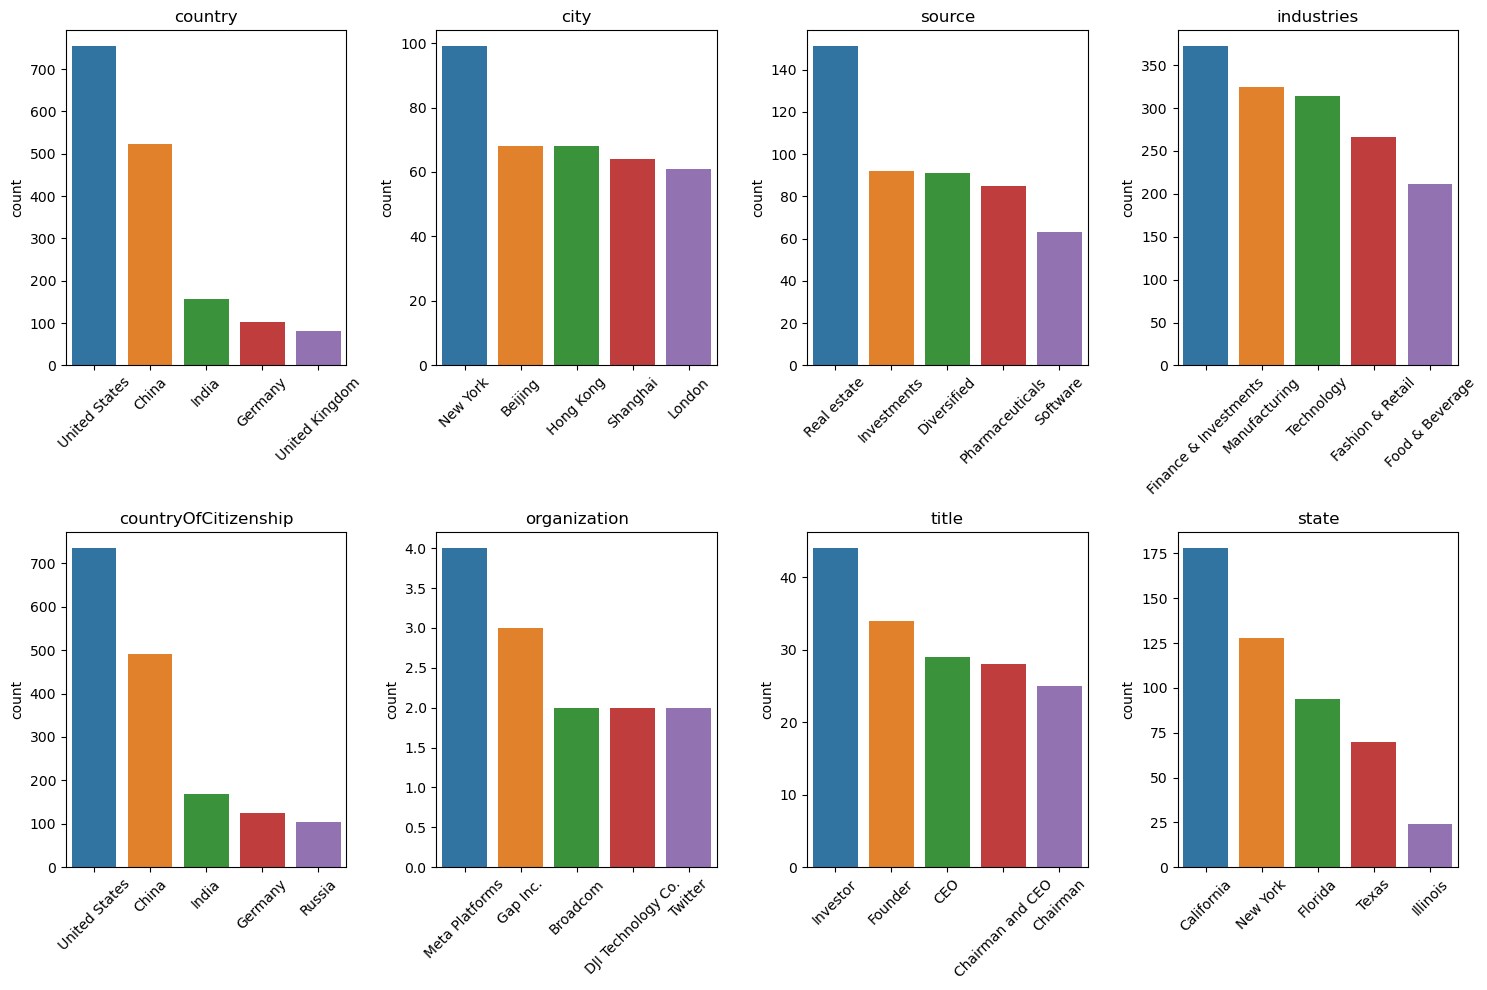

In [27]:
num_cols = 4
num_rows = 2
total_plots = num_cols * num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for idx, col in enumerate(cat_col[:total_plots]):
    ax = axes[idx // num_cols, idx % num_cols]
    ax.set_title(f'{col}')
    col_df = df[col].value_counts().reset_index()[:5]
    sns.barplot(data=col_df, x='index', y=col, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('count')
    ax.tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()


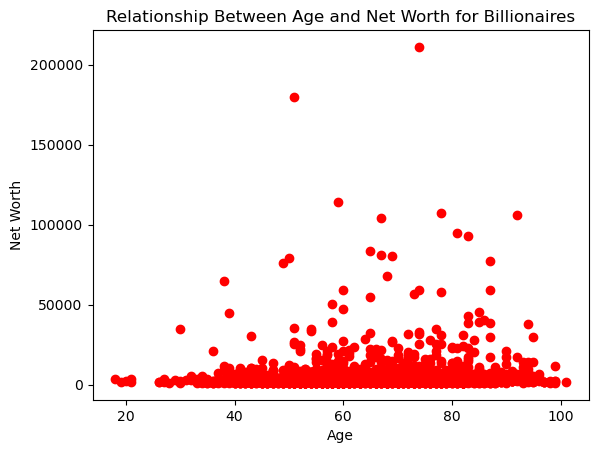

In [28]:
filters = df[(df['age'] >= 0) & (df['finalWorth'] > 0)]

plt.scatter(filters['age'], filters['finalWorth'], color='red')
plt.xlabel('Age')
plt.ylabel('Net Worth')
plt.title('Relationship Between Age and Net Worth for Billionaires')
plt.show()

In [29]:
# Calculate the average final worth of billionaires for each year
average_final_worth_by_year = df.groupby('age')['finalWorth'].mean()

average_final_worth_by_year.head()

age
18.0    3500.0
19.0    1700.0
20.0    2300.0
21.0    2600.0
26.0    1450.0
Name: finalWorth, dtype: float64

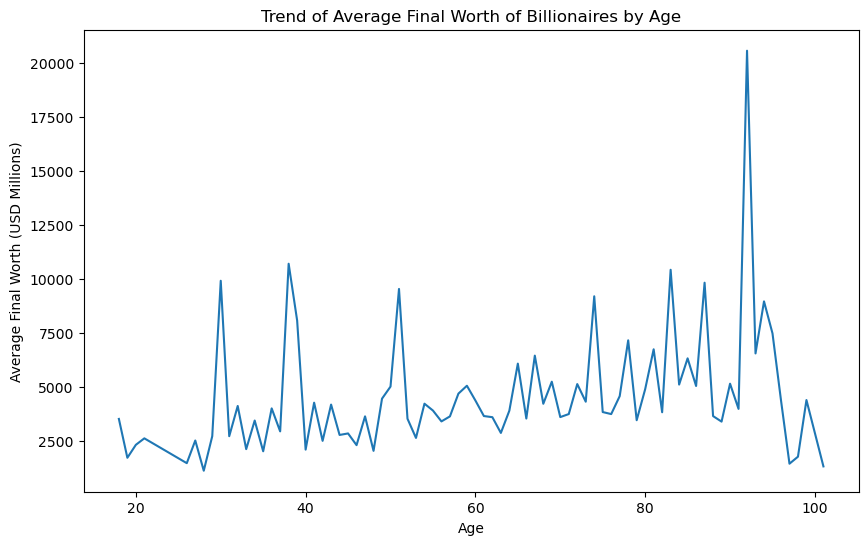

In [30]:
# Create a line chart showing the trend of the average final worth of billionaires over time
plt.figure(figsize=(10, 6))
plt.plot(average_final_worth_by_year.index, average_final_worth_by_year.values)
plt.title('Trend of Average Final Worth of Billionaires by Age')
plt.xlabel('Age')
plt.ylabel('Average Final Worth (USD Millions)')
plt.show()

[Text(0.5, 0, 'Final Worth'), Text(0, 0.5, 'Industry')]

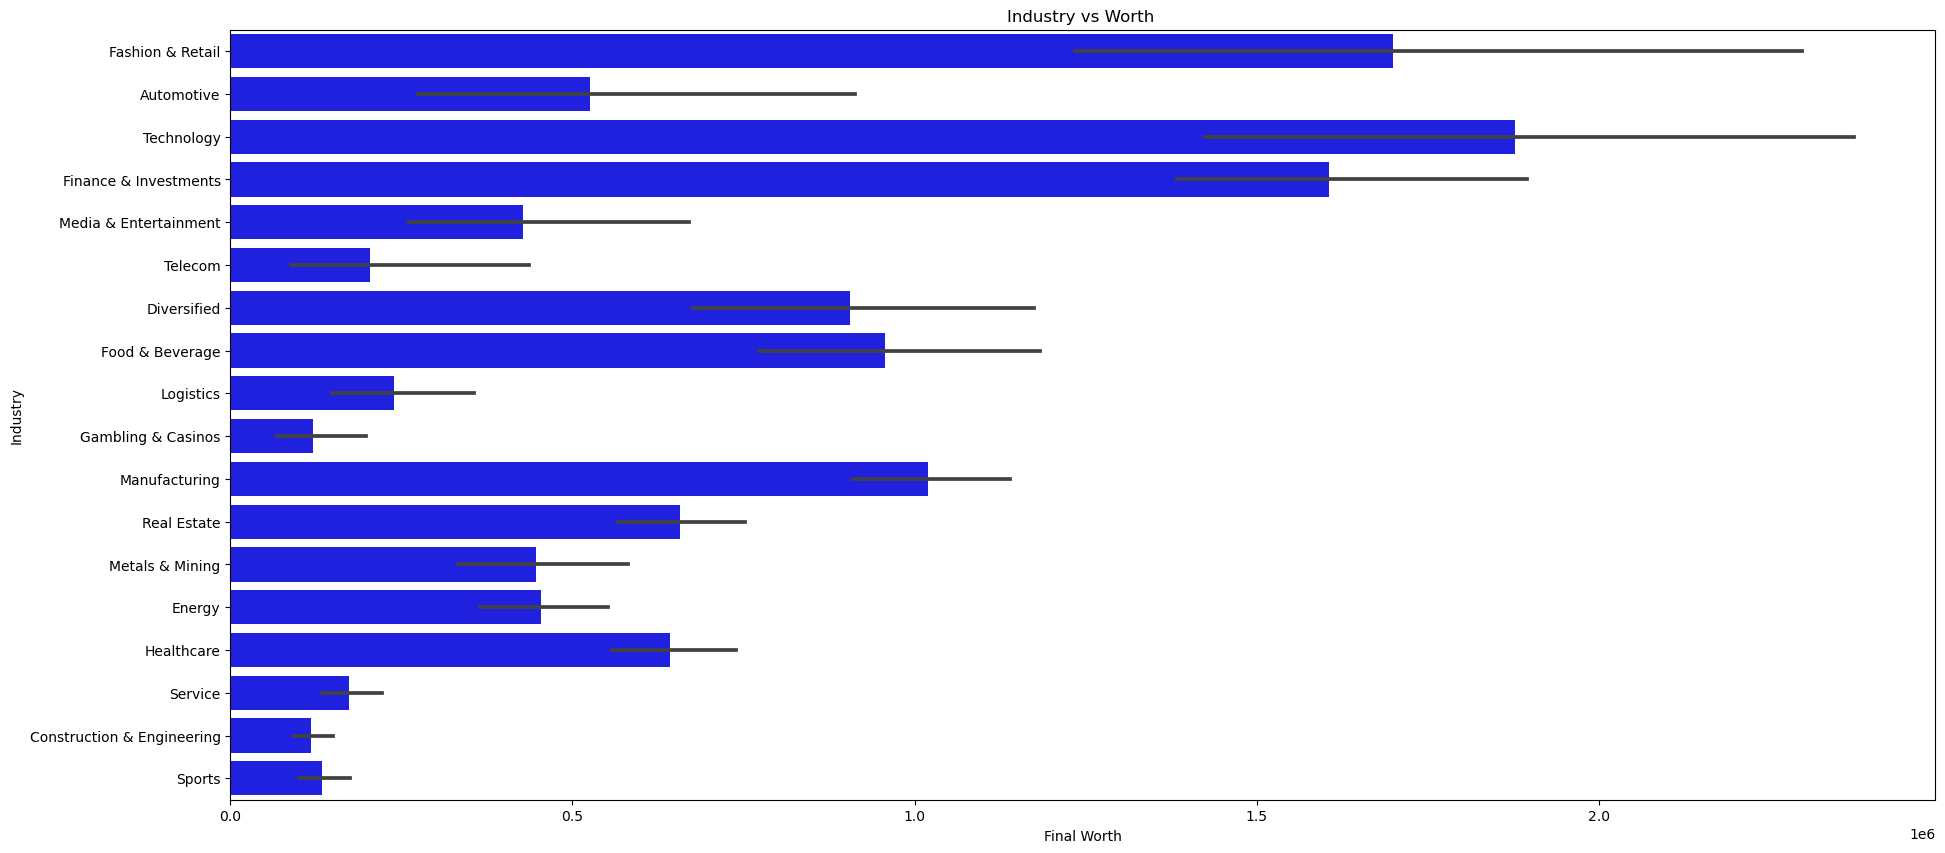

In [31]:
x=plt.figure(figsize=(22,10))
ax = sns.barplot(y=df["industries"],                 
                 x=df["finalWorth"],estimator=sum,color="b")
ax.set_title('Industry vs Worth ')
ax.set(xlabel='Final Worth', ylabel='Industry')

C:\Users\agung\AppData\Local\Temp\ipykernel_2672\2394912450.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

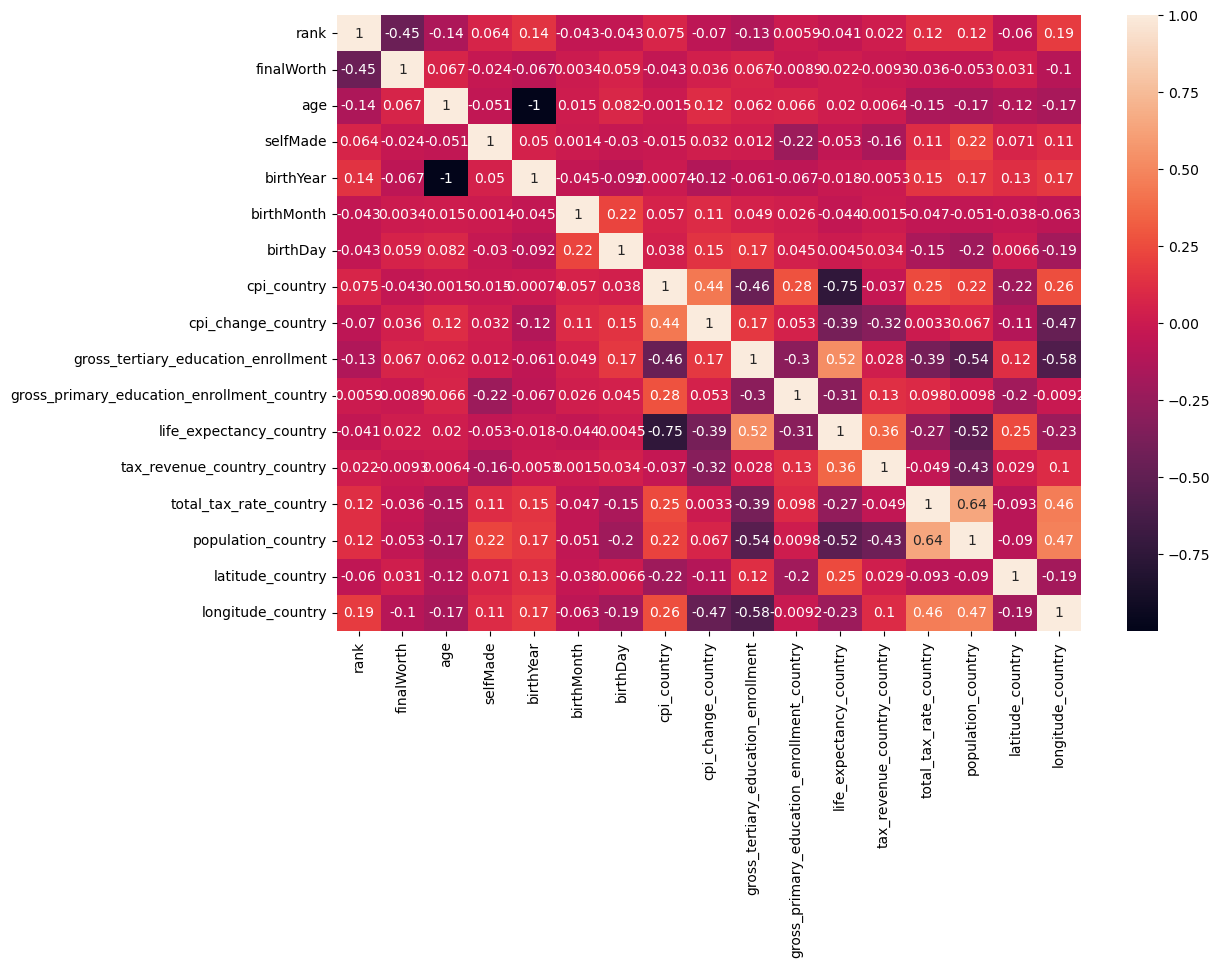

In [32]:
# Get the correlation matrix of the numerical columns
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, ax=ax)

In [33]:
# Mengelompokkan data berdasarkan kategori industri
industries = df['industries'].unique()
groups = [df[df['industries'] == ind]['finalWorth'] for ind in industries]

# Melakukan ANOVA
f_val, p_val = f_oneway(*groups)

print("Hasil ANOVA:")
print("Nilai F =", f_val)
print("Nilai p =", p_val)


Hasil ANOVA:
Nilai F = 2.45992760782864
Nilai p = 0.0007640133864893213


# <strong> 4. Imputasi, Cleaning, Balancing dan Seleksi Fitur (Materi 7, 8, 9) </strong>
----

In [34]:
# Memisahkan target (y) dan fitur (X)
y = df['finalWorth']
X = df.drop(['rank', 'finalWorth'], axis=1)

# Menghapus kolom-kolom yang tidak akan digunakan sebagai fitur
cols_to_drop = [
    "source", "industries", "organization", 'title', 'state',
    'residenceStateRegion', "city", "birthDate", 'birthMonth', 'birthDay',
    'lastName', 'firstName', 'birthYear', 'date', 'latitude_country',
    'longitude_country', 'personName', 'gdp_country'
]
X = X.drop(cols_to_drop, axis=1)

X

,category,age,country,countryOfCitizenship,selfMade,status,gender,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country
0,Fashion & Retail,74.0,France,France,0,U,M,110.05,1.1,65.6,102.5,82.5,24.2,60.7,6.705989e+07
1,Automotive,51.0,United States,United States,1,D,M,117.24,7.5,88.2,101.8,78.5,9.6,36.6,3.282395e+08
2,Technology,59.0,United States,United States,1,D,M,117.24,7.5,88.2,101.8,78.5,9.6,36.6,3.282395e+08
3,Technology,78.0,United States,United States,1,U,M,117.24,7.5,88.2,101.8,78.5,9.6,36.6,3.282395e+08
4,Finance & Investments,92.0,United States,United States,1,D,M,117.24,7.5,88.2,101.8,78.5,9.6,36.6,3.282395e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,Healthcare,51.0,China,China,1,D,M,125.08,2.9,50.6,100.2,77.0,9.4,59.2,1.397715e+09
2636,Food & Beverage,80.0,United States,United States,0,E,M,117.24,7.5,88.2,101.8,78.5,9.6,36.6,3.282395e+08
2637,Manufacturing,60.0,China,China,1,R,M,125.08,2.9,50.6,100.2,77.0,9.4,59.2,1.397715e+09
2638,Real Estate,71.0,China,China,1,D,M,125.08,2.9,50.6,100.2,77.0,9.4,59.2,1.397715e+09


In [35]:
X = X.rename(columns={
    'countryOfCitizenship': 'Citizenship',
    'selfMade': 'Self Made',
    'cpi_change_country': 'CPI Change',
    'cpi_country': 'CPI',
    'gross_tertiary_education_enrollment': 'Gross Tertiary Education',
    'gross_primary_education_enrollment_country': 'Gross Primary Education',
    'life_expectancy_country': 'Life Expectancy',
    'tax_revenue_country_country': 'Tax Revenue',
    'total_tax_rate_country': 'Total Tax',	
    'population_country': 'Population'
})

X

,category,age,country,Citizenship,Self Made,status,gender,CPI,CPI Change,Gross Tertiary Education,Gross Primary Education,Life Expectancy,Tax Revenue,Total Tax,Population
0,Fashion & Retail,74.0,France,France,0,U,M,110.05,1.1,65.6,102.5,82.5,24.2,60.7,6.705989e+07
1,Automotive,51.0,United States,United States,1,D,M,117.24,7.5,88.2,101.8,78.5,9.6,36.6,3.282395e+08
2,Technology,59.0,United States,United States,1,D,M,117.24,7.5,88.2,101.8,78.5,9.6,36.6,3.282395e+08
3,Technology,78.0,United States,United States,1,U,M,117.24,7.5,88.2,101.8,78.5,9.6,36.6,3.282395e+08
4,Finance & Investments,92.0,United States,United States,1,D,M,117.24,7.5,88.2,101.8,78.5,9.6,36.6,3.282395e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,Healthcare,51.0,China,China,1,D,M,125.08,2.9,50.6,100.2,77.0,9.4,59.2,1.397715e+09
2636,Food & Beverage,80.0,United States,United States,0,E,M,117.24,7.5,88.2,101.8,78.5,9.6,36.6,3.282395e+08
2637,Manufacturing,60.0,China,China,1,R,M,125.08,2.9,50.6,100.2,77.0,9.4,59.2,1.397715e+09
2638,Real Estate,71.0,China,China,1,D,M,125.08,2.9,50.6,100.2,77.0,9.4,59.2,1.397715e+09


In [36]:
# Memisahkan nama-nama dari data
names = df['personName']

# Melakukan label encoding untuk kolom 'category' dan 'gender'
label_encoders = {}
categorical_features = ['category', 'gender']

for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])
    label_encoders[feature] = le

# Melakukan label encoding untuk kolom-kolom lain
features_to_encode = ['country', 'Citizenship', 'Self Made', 'status']

for feature in features_to_encode:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])
    label_encoders[feature] = le

# Hasil data yang telah di-preprocess
X


,category,age,country,Citizenship,Self Made,status,gender,CPI,CPI Change,Gross Tertiary Education,Gross Primary Education,Life Expectancy,Tax Revenue,Total Tax,Population
0,4,74.0,24,22,0,5,1,110.05,1.1,65.6,102.5,82.5,24.2,60.7,6.705989e+07
1,0,51.0,74,73,1,0,1,117.24,7.5,88.2,101.8,78.5,9.6,36.6,3.282395e+08
2,16,59.0,74,73,1,0,1,117.24,7.5,88.2,101.8,78.5,9.6,36.6,3.282395e+08
3,16,78.0,74,73,1,5,1,117.24,7.5,88.2,101.8,78.5,9.6,36.6,3.282395e+08
4,5,92.0,74,73,1,0,1,117.24,7.5,88.2,101.8,78.5,9.6,36.6,3.282395e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,8,51.0,16,13,1,0,1,125.08,2.9,50.6,100.2,77.0,9.4,59.2,1.397715e+09
2636,6,80.0,74,73,0,1,1,117.24,7.5,88.2,101.8,78.5,9.6,36.6,3.282395e+08
2637,10,60.0,16,13,1,3,1,125.08,2.9,50.6,100.2,77.0,9.4,59.2,1.397715e+09
2638,13,71.0,16,13,1,0,1,125.08,2.9,50.6,100.2,77.0,9.4,59.2,1.397715e+09


In [37]:
# Menghitung nilai NaN dalam setiap kolom
jumlah_nan_per_kolom = X.isna().sum()

# Menghitung total nilai NaN dalam seluruh DataFrame
total_nan = X.isna().sum().sum()

print("Jumlah NaN per kolom:")
print(jumlah_nan_per_kolom)

print("\nTotal NaN dalam DataFrame:", total_nan)

Jumlah NaN per kolom:
category                      0
age                          65
country                       0
Citizenship                   0
Self Made                     0
status                        0
gender                        0
CPI                         184
CPI Change                  184
Gross Tertiary Education    182
Gross Primary Education     181
Life Expectancy             182
Tax Revenue                 183
Total Tax                   182
Population                  164
dtype: int64

Total NaN dalam DataFrame: 1507


In [38]:
X = X.fillna(X.mean())

In [39]:
# Menghitung nilai NaN dalam setiap kolom
jumlah_nan_per_kolom = X.isna().sum()

# Menghitung total nilai NaN dalam seluruh DataFrame
total_nan = X.isna().sum().sum()

print("Jumlah NaN per kolom:")
print(jumlah_nan_per_kolom)

print("\nTotal NaN dalam DataFrame:", total_nan)

Jumlah NaN per kolom:
category                    0
age                         0
country                     0
Citizenship                 0
Self Made                   0
status                      0
gender                      0
CPI                         0
CPI Change                  0
Gross Tertiary Education    0
Gross Primary Education     0
Life Expectancy             0
Tax Revenue                 0
Total Tax                   0
Population                  0
dtype: int64

Total NaN dalam DataFrame: 0


In [40]:
# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## - Seleksi Fitur Menggunakan Random Forest

In [41]:
# Melatih model RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
# Mendapatkan feature importance dari model
feature_importances = rf.feature_importances_

# Membuat DataFrame untuk menampilkan feature importance
importance_df_RF = pd.DataFrame({'Fitur': X.columns, 'Importance': feature_importances})

# Mengurutkan fitur berdasarkan importance
importance_df_RF = importance_df_RF.sort_values(by='Importance', ascending=False)

# Menampilkan 5 fitur teratas
top_5_features = importance_df_RF.head(5)

print("5 fitur teratas:")
print(top_5_features)

5 fitur teratas:
         Fitur  Importance
1          age    0.464223
0     category    0.187190
5       status    0.067386
4    Self Made    0.049165
3  Citizenship    0.041250


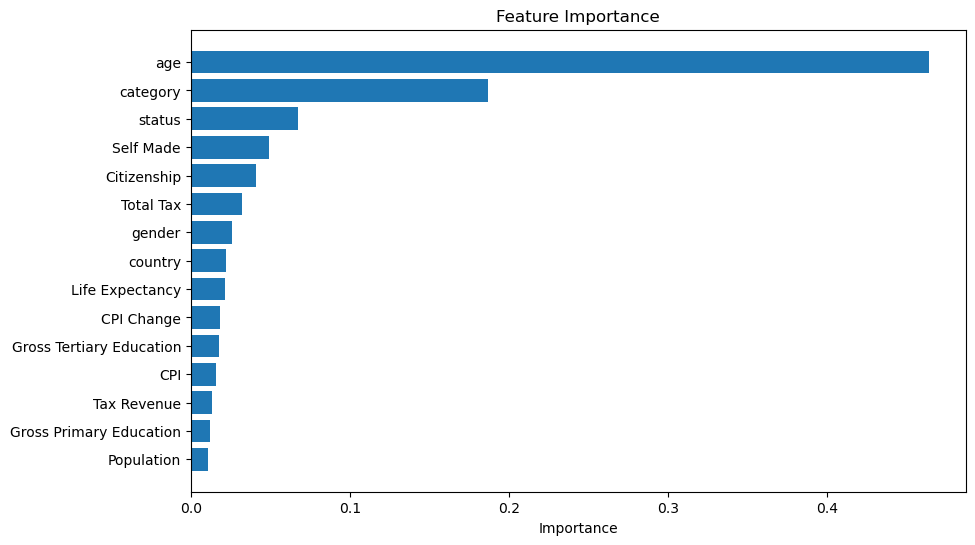

In [43]:
importance_df_RF = importance_df_RF.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df_RF['Fitur'], importance_df_RF['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

## - Seleksi Fitur Menggunakan XGBoost

In [44]:
XGBR = XGBRegressor()
XGBR.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [45]:
# Mendapatkan feature importance dari model
feature_importances = XGBR.feature_importances_

# Membuat DataFrame untuk menampilkan feature importance
importance_df_XGBR = pd.DataFrame({'Fitur': X.columns, 'Importance': feature_importances})

# Mengurutkan fitur berdasarkan importance
importance_df_XGBR = importance_df_XGBR.sort_values(by='Importance', ascending=False)

# Menampilkan 5 fitur teratas
top_5_features = importance_df_XGBR.head(5)

print("5 fitur teratas:")
print(top_5_features)

5 fitur teratas:
              Fitur  Importance
13        Total Tax    0.131988
11  Life Expectancy    0.120091
0          category    0.092708
1               age    0.091726
4         Self Made    0.080803


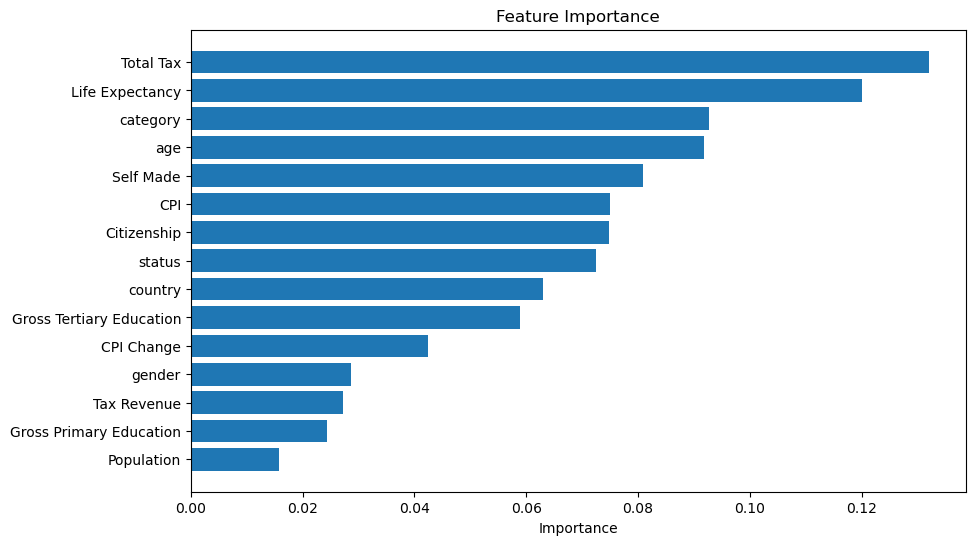

In [46]:
importance_df_XGBR = importance_df_XGBR.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df_XGBR['Fitur'], importance_df_XGBR['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# <strong> 5. Rekonstruksi Data (Materi 9) </strong>
----

## - Normalisasi

In [47]:
#Menghitung mean
means = X.mean(axis = 0)

# menghitung max - min
max_min = X.max(axis = 0) - X.min(axis = 0)

# menerapkan transformasi ke data
train_scaled_norm = (X - means) / max_min

In [48]:
#Tampilkan hasil
train_scaled_norm

,category,age,country,Citizenship,Self Made,status,gender,CPI,CPI Change,Gross Tertiary Education,Gross Primary Education,Life Expectancy,Tax Revenue,Total Tax,Population
0,-0.245410,0.106745,-0.287636,-0.279207,-0.686364,0.594394,0.127652,-0.093668,-0.058920,-0.012260,-0.006246,0.146394,0.314118,0.173617,-0.317059
1,-0.480704,-0.170364,0.353390,0.391846,0.313636,-0.405606,0.127652,-0.055630,0.056603,0.158177,-0.018441,0.012615,-0.079413,-0.076383,-0.130192
2,0.460472,-0.073978,0.353390,0.391846,0.313636,-0.405606,0.127652,-0.055630,0.056603,0.158177,-0.018441,0.012615,-0.079413,-0.076383,-0.130192
3,0.460472,0.154937,0.353390,0.391846,0.313636,0.594394,0.127652,-0.055630,0.056603,0.158177,-0.018441,0.012615,-0.079413,-0.076383,-0.130192
4,-0.186586,0.323612,0.353390,0.391846,0.313636,-0.405606,0.127652,-0.055630,0.056603,0.158177,-0.018441,0.012615,-0.079413,-0.076383,-0.130192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,-0.010116,-0.170364,-0.390200,-0.397628,0.313636,-0.405606,0.127652,-0.014153,-0.026429,-0.125382,-0.046316,-0.037553,-0.084804,0.158057,0.634989
2636,-0.127763,0.179034,0.353390,0.391846,-0.686364,-0.205606,0.127652,-0.055630,0.056603,0.158177,-0.018441,0.012615,-0.079413,-0.076383,-0.130192
2637,0.107531,-0.061930,-0.390200,-0.397628,0.313636,0.194394,0.127652,-0.014153,-0.026429,-0.125382,-0.046316,-0.037553,-0.084804,0.158057,0.634989
2638,0.284002,0.070600,-0.390200,-0.397628,0.313636,-0.405606,0.127652,-0.014153,-0.026429,-0.125382,-0.046316,-0.037553,-0.084804,0.158057,0.634989


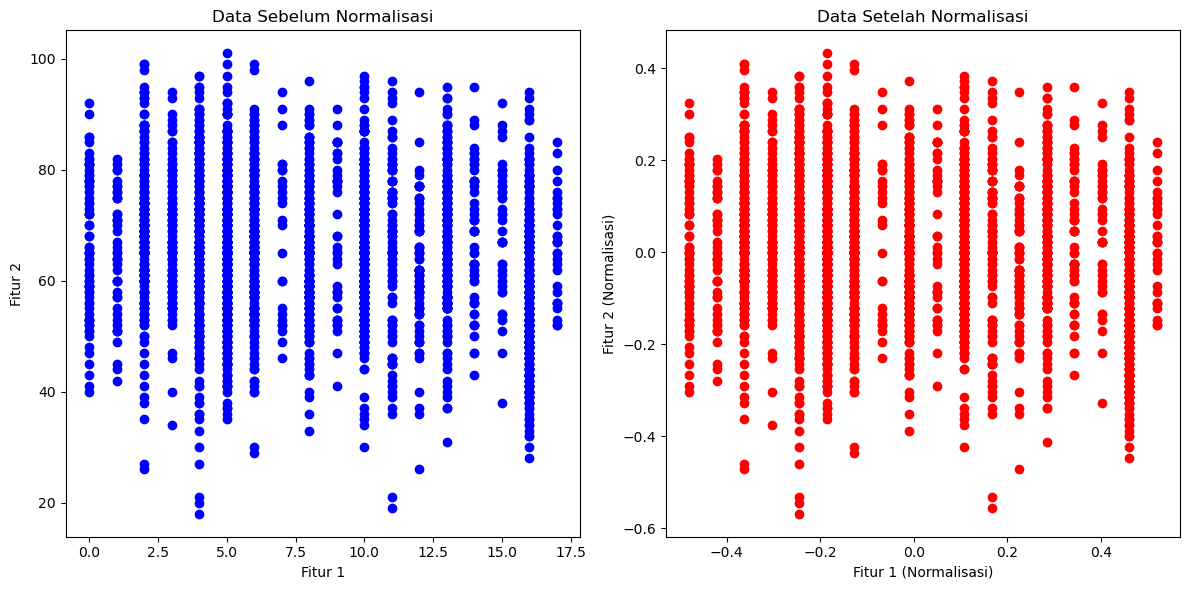

In [49]:
# Visualisasikan data sebelum dan sesudah normalisasi
plt.figure(figsize=(12, 6))

# Visualisasi data sebelum normalisasi
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='blue', label='Sebelum Normalisasi')
plt.title('Data Sebelum Normalisasi')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')

# Visualisasi data setelah normalisasi
plt.subplot(1, 2, 2)
plt.scatter(train_scaled_norm.iloc[:, 0], train_scaled_norm.iloc[:, 1], c='red', label='Setelah Normalisasi')
plt.title('Data Setelah Normalisasi')
plt.xlabel('Fitur 1 (Normalisasi)')
plt.ylabel('Fitur 2 (Normalisasi)')

plt.tight_layout()
plt.show()

## - Standarisasi

In [50]:
#Buat objek scaler
scaler = StandardScaler()

#Sesuaikan scaler dengan data
scaler.fit(X)

#Mengubah data kereta 
train_scaled_stand = scaler.transform(X)

In [51]:
train_scaled_stand

array([[-0.88177339,  0.67676935, -0.88593146, ...,  2.2505618 ,
         1.42843334, -0.82576993],
       [-1.72719985, -1.08011962,  1.08845572, ..., -0.5689736 ,
        -0.62844372, -0.33908029],
       [ 1.65450599, -0.4690278 ,  1.08845572, ..., -0.5689736 ,
        -0.62844372, -0.33908029],
       ...,
       [ 0.3863663 , -0.39264132, -1.20183341, ..., -0.60759737,
         1.30041194,  1.65381104],
       [ 1.02043614,  0.44760992, -1.20183341, ..., -0.60759737,
         1.30041194,  1.65381104],
       [-1.30448662,  0.06567754,  0.25921311, ...,  0.2807494 ,
        -0.07368435, -0.74926364]])

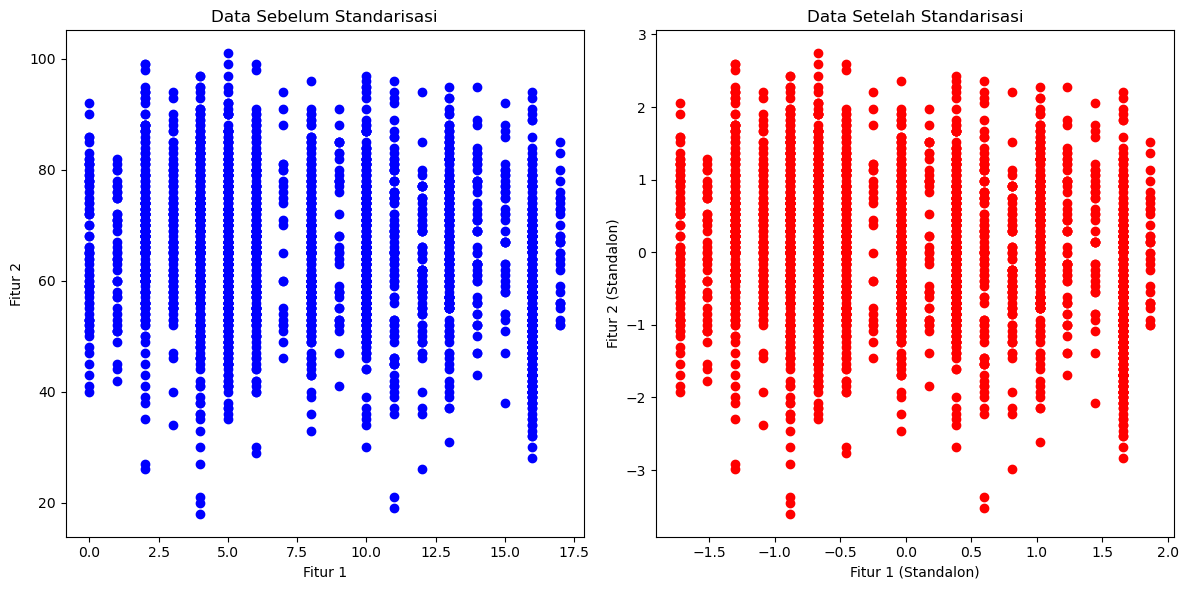

In [52]:
# Visualisasikan data sebelum dan sesudah standarisasi
plt.figure(figsize=(12, 6))

# Visualisasi data sebelum standarisasi
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='blue', label='Sebelum Standarisasi')
plt.title('Data Sebelum Standarisasi')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')

# Visualisasi data setelah standarisasi
plt.subplot(1, 2, 2)
plt.scatter(train_scaled_stand[:, 0], train_scaled_stand[:, 1], c='red', label='Setelah Standarisasi')
plt.title('Data Setelah Standarisasi')
plt.xlabel('Fitur 1 (Standalon)')
plt.ylabel('Fitur 2 (Standalon)')

plt.tight_layout()
plt.show()